## **Heart Disease Dataset**

---

Las enfermedades del corazón son una de las principales causas de muerte en el mundo. La detección y el diagnóstico tempranos de las enfermedades del corazón pueden salvar vidas. Este conjunto de datos contiene información sobre diversos factores de riesgo de enfermedades cardíacas. Puede utilizarse para desarrollar modelos que permitan predecir el riesgo de cardiopatía en los individuos. Los datos también pueden utilizarse para identificar posibles factores de riesgo de enfermedades cardíacas.

Este conjunto de datos data de 1988 y consta de cuatro bases de datos: Cleveland, Hungría, Suiza y Long Beach V. Contiene 76 atributos, incluido el atributo de predicción, pero todos los experimentos publicados se refieren al uso de un subconjunto de 14 de ellos. El campo "objetivo" se refiere a la presencia de una enfermedad cardíaca en el paciente, con un valor entero de 1 si esta enfermo y de 0 si no lo esta.

#### **Descripción de las variables**

* age -- edad en años.
* sex -- (1 = masculino; 0 = femenino). 
* cp -- tipo de dolor en el pecho.
* trestbps -- presión arterial en reposo (en mm Hg al ingresar en el hospital).
* chol -- colesterol sérico en mg/dl.
* fbs -- (glucemia en ayunas &gt; 120 mg/dl) (1 = verdadero; 0 = falso).
* restecg -- resultados electrocardiográficos en reposo.
* thalach -- frecuencia cardíaca máxima alcanzada.
* exang -- angina inducida por el ejercicio (1 = sí; 0 = no).
* oldpeak -- depresión del ST inducida por el ejercicio en relación con el reposo.
* slope -- la pendiente del segmento ST máximo de ejercicio.
* ca -- número de vasos mayores (0-3) coloreados por la fluroscopia.
* thal -- 1 = normal; 2 = defecto fijo; 3 = defecto reversible.

#### **Preguntas**

- *
- *

 Limpieza de datos, Exploración de datos, Preprocesamiento y Machine Learning (regresión logística para la predicción de la variable binaria ‘riesgo de desarrollar la enfermedad’). 

 Patrones:

- Patrones de edad: la enfermedad cardiovascular es más común en personas mayores de 65 años.
- Patrones de género: las mujeres tienen un riesgo más bajo de enfermedad cardiovascular que los hombres.
- Patrones de estilo de vida: las personas que fuman, tienen diabetes o hipertensión tienen un mayor riesgo de enfermedad cardiovascular.
- Patrones genéticos: algunas personas tienen un mayor riesgo de enfermedad cardiovascular debido a su historia familiar.


- Patrones relacionados con la edad: a medida que la edad avanza, el riesgo de enfermedad cardiovascular también aumenta.
- Patrones relacionados con el sexo: las mujeres suelen tener un riesgo más bajo de enfermedades cardiovasculares que los hombres.
- Patrones relacionados con el estilo de vida: los factores de estilo de vida, como el tabaquismo, la obesidad y la inactividad física, aumentan el riesgo de enfermedades cardiovasculares.
- Patrones relacionados con la historia familiar: las personas con antecedentes familiares de enfermedades cardiovasculares tienen un mayor riesgo de desarrollar la enfermedad.

## **Importacion de las librerias y datos**

---


In [1]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

# Data analysis imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('darkgrid')
colors = sns.color_palette('pastel')
sns.set_palette(['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff66b3'])
%matplotlib inline

# Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

In [2]:
# Data extraida de kaggle
df = pd.read_csv('https://raw.githubusercontent.com/Xukay101/curso-data-science/main/datasets/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##  **Exploración de datos (EDA)**

---

In [4]:
# Comprobación de tipos de datos, valores únicos y valores perdidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


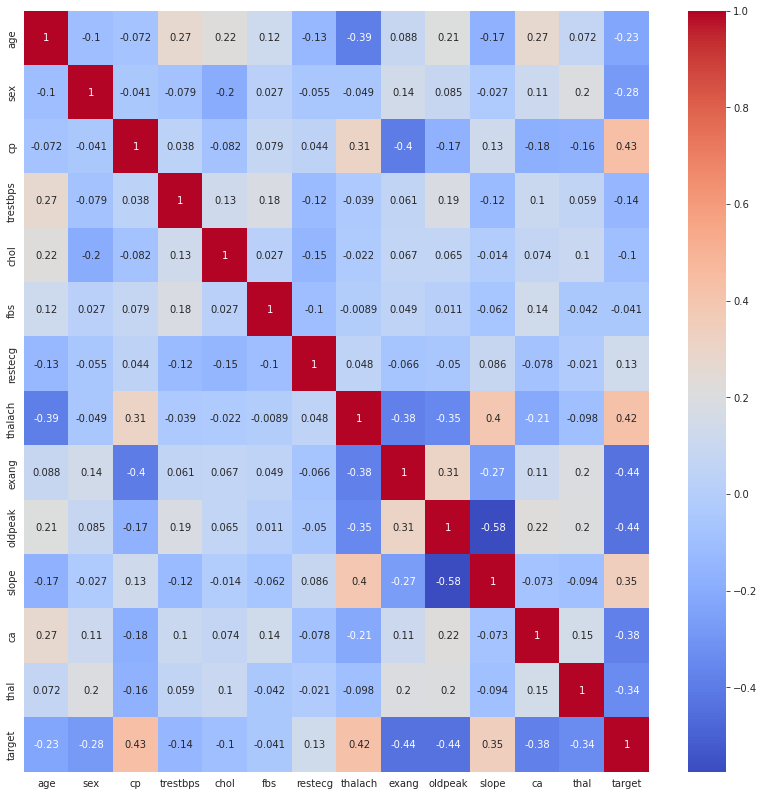

In [5]:
# calculando la matriz de correlación
corr = df.corr()

# generando el gráfico de correlación
fig, ax=plt.subplots(figsize=(14, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm')

(-1.1054469110257978,
 1.1105416454098074,
 -1.1081064432547034,
 1.1003860211073668)

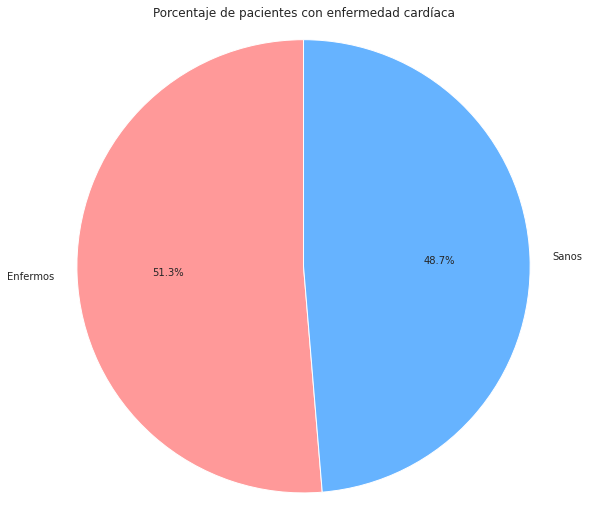

In [6]:
# calculo del porcentaje de registros con enfermedad
total_registros = len(df)
registros_enfermos = len(df[df["target"]==1])
porcentaje_enfermos = (registros_enfermos / total_registros) * 100

# Gráfico de pastel
fig, ax=plt.subplots(figsize=(9, 9))
labels = ['Enfermos','Sanos']
sizes = [porcentaje_enfermos,100-porcentaje_enfermos]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje de pacientes con enfermedad cardíaca")
plt.axis('equal')

El gráfico de barras presentado muestra el porcentaje de registros que presentan una enfermedad cardíaca y aquellos que no la presentan. Se puede observar que el porcentaje de registros con enfermedad cardíaca es del 51.3% mientras que el porcentaje de registros sin enfermedad cardíaca es del 48.7%.

Text(0.5, 1.0, 'Distribución de edad según condición de salud')

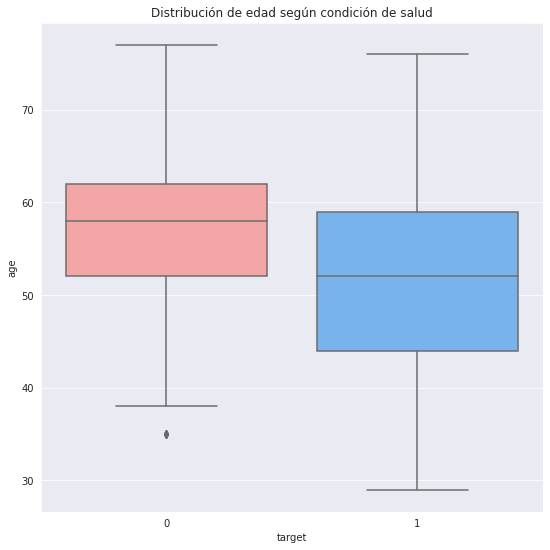

In [7]:
fig, ax=plt.subplots(figsize=(9, 9))
sns.boxplot(x='target',y='age', data=df)
plt.title("Distribución de edad según condición de salud")


Text(0.5, 1.0, 'Distribución de género según condición de salud')

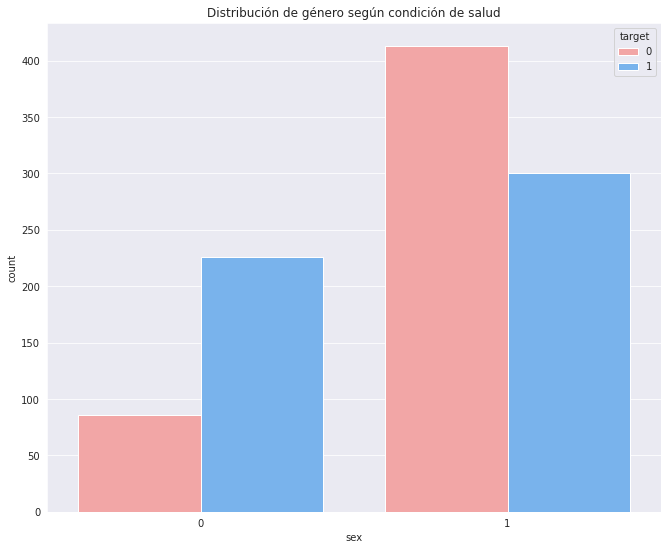

In [8]:
fig, ax=plt.subplots(figsize=(11, 9))
sns.countplot(x='sex',hue='target', data=df)
plt.title("Distribución de género según condición de salud")

Text(0.5, 1.0, 'Relación entre colesterol y edad según condición de salud')

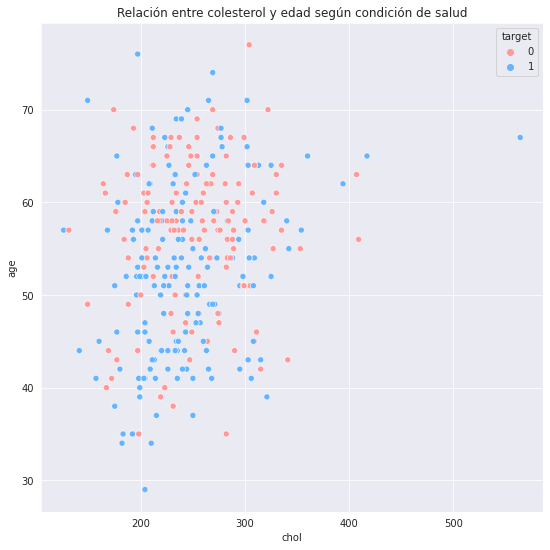

In [9]:
fig, ax=plt.subplots(figsize=(9, 9))
sns.scatterplot(x='chol',y='age',hue='target',data=df)
plt.title("Relación entre colesterol y edad según condición de salud")

Text(0.5, 1.0, 'Distribución de tipo de dolor en el pecho según condición de salud')

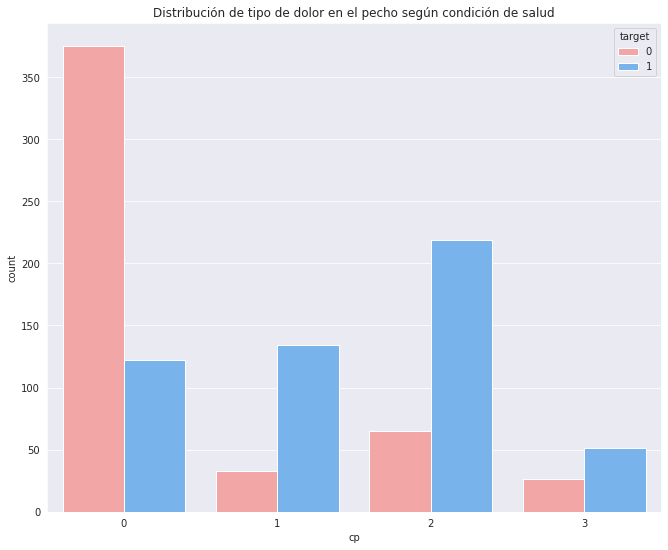

In [10]:
fig, ax=plt.subplots(figsize=(11, 9))
sns.countplot(x='cp',hue='target', data=df)
plt.title("Distribución de tipo de dolor en el pecho según condición de salud")

Text(0.5, 1.0, 'Evolución de la presión arterial según edad y condición de salud')

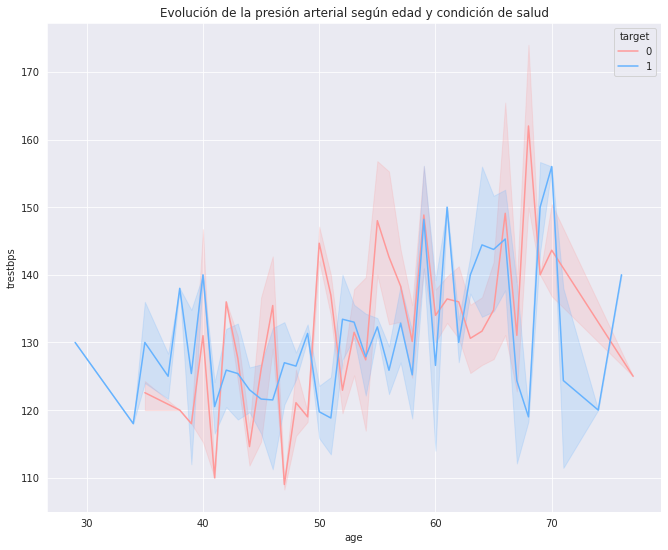

In [11]:
fig, ax=plt.subplots(figsize=(11, 9))
sns.lineplot(x="age", y="trestbps",hue="target",data=df)
plt.title("Evolución de la presión arterial según edad y condición de salud")

Text(0.5, 1.0, 'Distribución de la pendiente de las ondas según condición de salud')

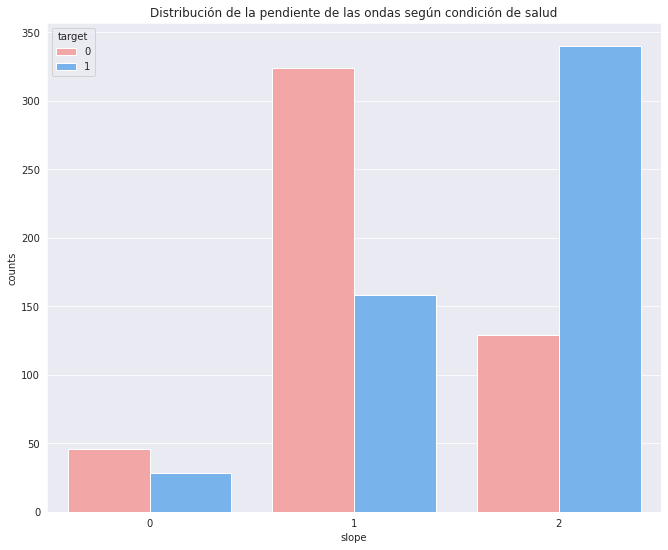

In [12]:
fig, ax=plt.subplots(figsize=(11, 9))
df_plot = df.groupby(['target', 'slope'])['age'].count().reset_index(name='counts')
sns.barplot(x='slope', y='counts', hue='target', data=df_plot)
plt.title("Distribución de la pendiente de las ondas según condición de salud")

Text(0.5, 1.0, 'Proporción de pacientes con enfermedad cardíaca y pacientes sanos según nivel de azúcar en sangre')

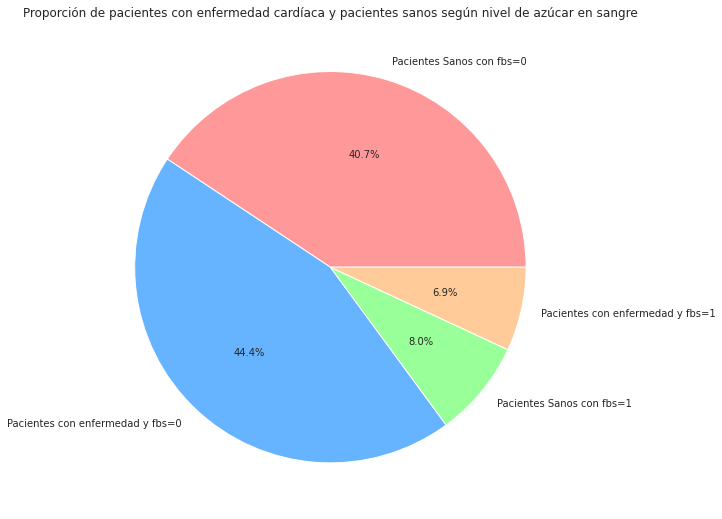

In [13]:
df_fbs_0 = df[df['target']==0]['fbs'].value_counts()
df_fbs_1 = df[df['target']==1]['fbs'].value_counts()

fig, ax=plt.subplots(figsize=(9, 9))
plt.pie([df_fbs_0[0], df_fbs_1[0], df_fbs_0[1], df_fbs_1[1]], labels=['Pacientes Sanos con fbs=0', 'Pacientes con enfermedad y fbs=0', 'Pacientes Sanos con fbs=1', 'Pacientes con enfermedad y fbs=1'], autopct='%1.1f%%')
plt.title("Proporción de pacientes con enfermedad cardíaca y pacientes sanos según nivel de azúcar en sangre")

Text(0.5, 1.0, 'Distribución de la frecuencia cardíaca máxima según condición de salud')

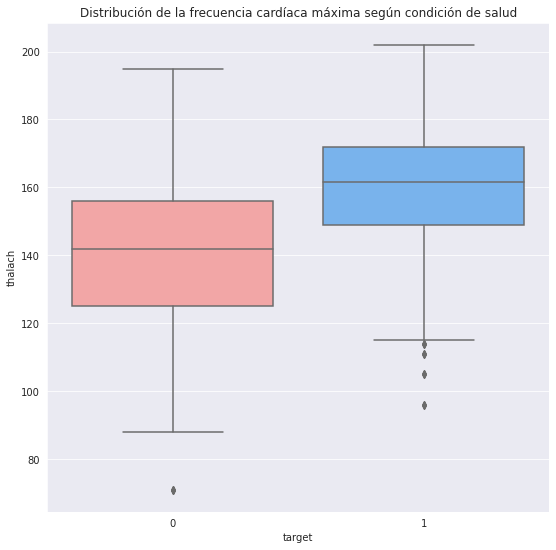

In [14]:
fig, ax=plt.subplots(figsize=(9, 9))
sns.boxplot(x="target", y="thalach",data=df)
plt.title("Distribución de la frecuencia cardíaca máxima según condición de salud")

Analizando las relaciones entre las características y la variable objetivo. Se pudo observar que la edad, el colesterol y la frecuencia cardíaca máxima presentan una relación con la enfermedad cardíaca, siendo estas variables más altas en pacientes con enfermedad cardíaca. Además, se observó que existe una mayor proporción de hombres con enfermedad cardíaca en comparación con las mujeres y también se encontró una relación entre el tipo de dolor en el pecho y la enfermedad cardíaca.

## **Data Cleaning**

___

In [15]:
# Analisis de valores nulos
print(f'Valores nulos: {df.isna().sum()}')
# Tratamiento de valores nulos
df.fillna(df.mean())

Valores nulos: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


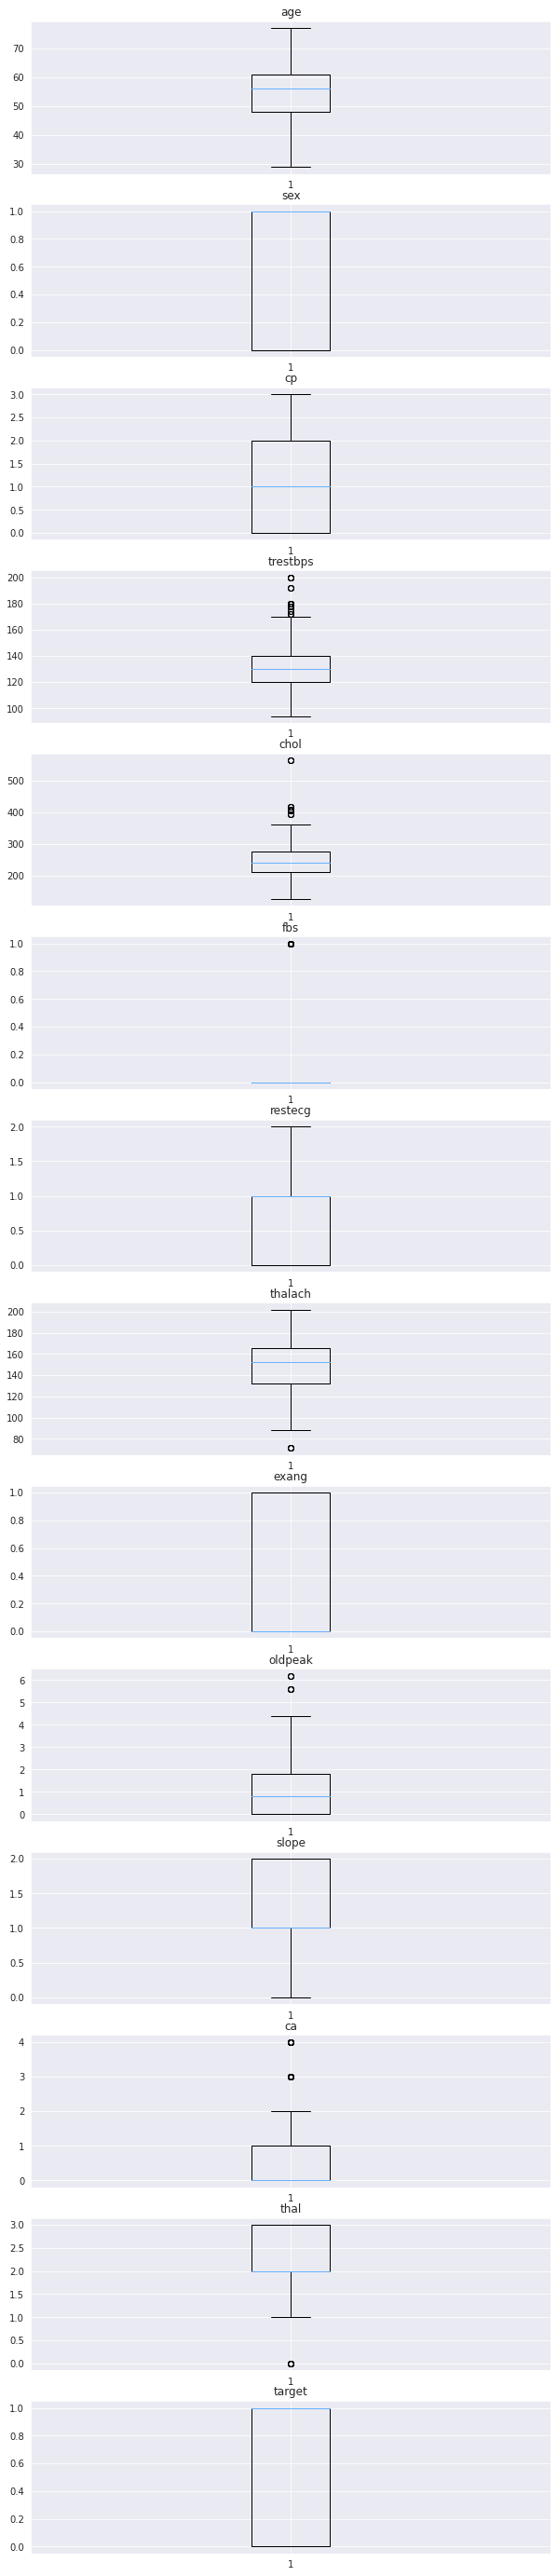

In [16]:
# Analisis de outliers
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10,50))
for i, column in enumerate(df.columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)

In [17]:
# Rango intercuartilico para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Eliminacion de valores fuera del rango
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Cantidad de filas: {df_out.shape[0]}')

Cantidad de filas: 769


Otro paso importante sería la limpieza de datos, es decir, detectar y tratar valores faltantes o outliers.

Además, también se podría realizar un análisis estadístico para conocer la distribución de las características y detectar posibles sesgos en los datos.

En resumen, el siguiente paso en el EDA sería analizar las relaciones entre las características, limpiar los datos y analizar las distribuciones de las características.

## **Preprocesamiento**

___

### Encoding

In [18]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### Feature Engineering

In [25]:
# Creacion de nuevas variables

df['ratio_trestbps_chol'] = df['trestbps'] / df['chol'] # relacion entre la variable 'trestbps' y la variable 'chol'
df['prod_thalach_oldpeak'] = df['thalach'] * df['oldpeak'] # producto entre la variable 'thalach' y la variable 'oldpeak'
df['prod_age_chol'] = df['age'] * df['chol'] # Producto entre la variable 'age' y 'chol'

In [26]:
# Se calcula la correlación entre las nuevas variables y la variable objetivo 'target'
corr_matrix = df[['prod_age_chol', 'prod_thalach_oldpeak', 'ratio_trestbps_chol', 'target']].corr()

# Se imprime la matriz de correlación
corr_matrix

,prod_age_chol,prod_thalach_oldpeak,ratio_trestbps_chol,target
prod_age_chol,1.000000,0.132988,-0.568915,-0.186717
prod_thalach_oldpeak,0.132988,1.000000,0.077594,-0.388866
ratio_trestbps_chol,-0.568915,0.077594,1.000000,0.017532
target,-0.186717,-0.388866,0.017532,1.000000


## **Machine Learning**

___

In [27]:
# Modelo de regresion logistica
model = LogisticRegression()

# Selección de características
sfs = SFS(model, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)

In [28]:
X = df.drop('target', axis=1)
y = df['target']

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Obtencion de las mejores características
sfs.fit(X_train, y_train)

best_features = X_train.columns[list(sfs.k_feature_idx_)]

best_features

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Index(['trestbps', 'oldpeak', 'cp_0', 'restecg_2', 'slope_0', 'slope_2',
       'ca_0', 'ca_1', 'ca_4', 'thal_2'],
      dtype='object')

In [30]:
# Entrenamiento y predicciones
model.fit(X_train[best_features], y_train)
y_pred = model.predict(X_test[best_features])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Metricas
acc = accuracy_score(y_test, y_pred) # accuracy
print("Accuracy:", acc)

Accuracy: 0.8341463414634146
